# Prosper Loan Data Exploration


## by Sharon Dim


## Introduction


Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry.Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money.
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset; print first 5 rows

loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# print more informations about the dataset
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# An overview of data shape and types;
print(loans.shape)
print(loans.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


### What is the structure of your dataset?

> There are 113,937 rows with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Most of the variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest in this dataset is to explore BorrowerAPR, BorrowerRate variables, loan outcome status, differences between loans, most preferred term duration etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features in the dataset that will help support my investigation into the features of my interest are:

  Term	                                           
LoanStatus     
BorrowerAPR	
BorrowerRate   
ProsperRating (Alpha)
ListingCategory	
EmploymentStatus
IsBorrowerHomeowner
IncomeRange	       
DebtToIncomeRatio  
StatedMonthlyIncome
LoanOriginalAmount
MonthlyLoanPayment

# Univariate Exploration

#### Visualization 1

I'll start by looking at the loan status

Which categories do majority of the loans fall in ?

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


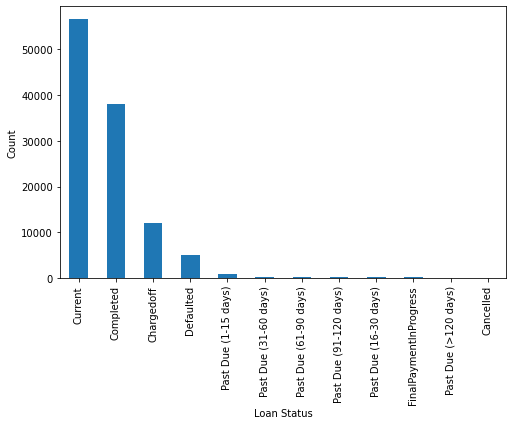

In [6]:
# plot a bar chart for the loan statuses
plt.figure(figsize = [8, 5]) 
loans['LoanStatus'].value_counts().plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

The above bar chart shows that majority of the loans in the dataset fall in the categories of Current,followed by Completed, then Chargedoff, and Defaulted and Past Due(1-15 days). days after the first 15 days of past due had very little loan data/information/status and activity and also the past due dates after 120 days and cancelled status had no loan data status to display.

#### Visualization 2

A quick exploration of the "Term"

In [7]:
loans.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

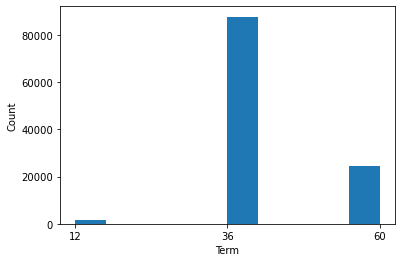

In [8]:
# plot a histogram to display the distribution of the terms 
plt.hist(data=loans, x='Term')
plt.xticks(ticks=[12, 36, 60], labels=['12', '36', '60'])
plt.xlabel('Term')
plt.ylabel('Count');

The above Histogram shows the most popular loan term is 36 months(3 years); A statistics of >80,000 people prefer this loan term plan, while over 20,000 people prefer 60 months term plan(5 years), while a very little population(< 50 people) prefer the 12month loan term plan(1 year).

#### Visualization 3

A quick look at the feature "BorrowerAPR"

What is the distribution of the Borrower APR ?

In [9]:
# Borrower APR statistiscs

loans.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

The bin edges was set using numpy's arange function
Descriptive statistics aids to gauge what minimum and maximum bin limits will be appropriate for the plot. 

In [10]:
def myHistPlot(df, xVar, interval, figsize=[14,6], title=''):
    '''
    input: takes a dataframe, a variable and interval 
    output: returns a histogram distribution of the variable 
    '''
    # set intervals for bins
    bins=np.arange(df[xVar].min(), df[xVar].max()+interval, interval)
    
    # plot
    df[xVar].hist(bins=bins, grid=False, edgecolor='black', figsize=figsize);
    
    # for labels, add a space instead of underscore
    xVar=xVar.replace("_"," ")
    
    # add title and format it 
    plt.title(f'Distrbution of {xVar}{title}'.title(), fontsize = 14, weight = "bold")
    
    # add X label and format it 
    plt.xlabel(xVar.title(), fontsize = 12, weight = "bold")
    
    # add y label and format it 
    plt.ylabel ('Frequency'.title(), fontsize=12, weight = "bold")

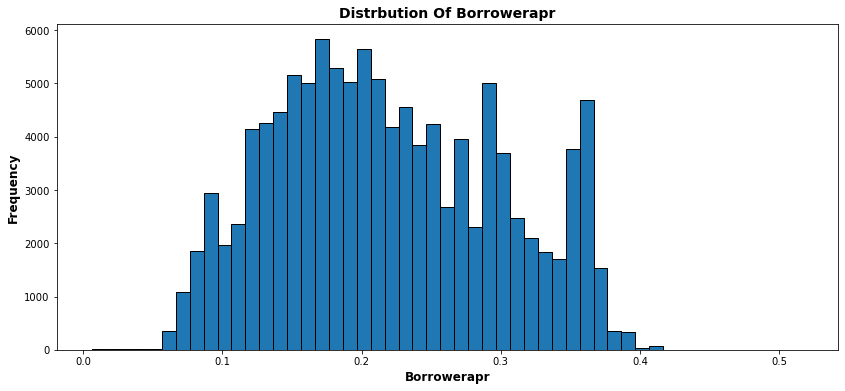

In [11]:

myHistPlot(loans,'BorrowerAPR', 0.01)

The distribution of APR shows a multi-modal data. The histogram shows a small peak centered at 0.09, a large peak centered at 0.17. There is also a slightly lower peak centered 0.2 and a also a little lower than 0.2 peak at 0.29, also a peak(slightly lower than 0.29 peak) at 0.36.The Highest peak was recorded at 0.17 and the lowest at 0.4. Statistics shows that very few people have an APR >= 0.4,at 0.5, there were no data records. The most people have an APR of 0.17, followed by 0.2, then 0.15 and 0.3. 
A high APR means that the customer will be paying a higher interest rate on money borrowed.

#### Visualization 4

A quick look at the feature "Borrower rate"


In [12]:
# looking at statistical properties 

loans.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

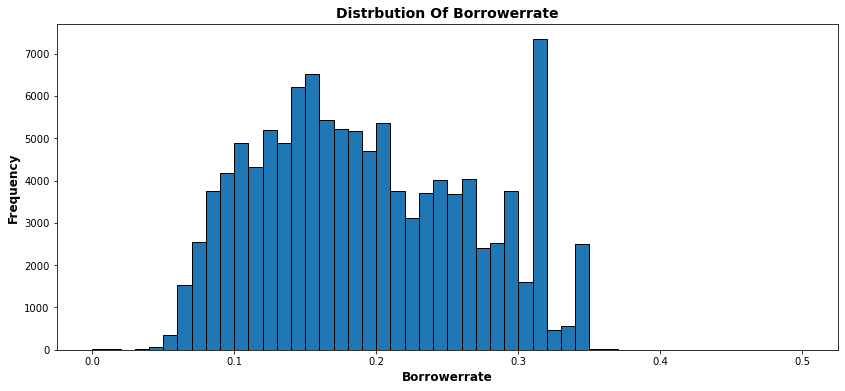

In [13]:
# plotting histogram;

myHistPlot(loans,'BorrowerRate', 0.01)

The histogram shows a Multi-modal data with a highest peak at 0.32. Very few loans have a rate greater than 0.35.At 0.4 and 0.5; no loan rates recorded. This shows a lot of borrowers(over 7,000 people) were given the loans at an interest rate of 0.32.

#### Visualization 5

A quick look at the feature "ListingCategory"

In [14]:
loans['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [15]:
#replacing the numbers with their corresponding meanings for accuracy of interpretations


listing_categories = {0 : 'Not Available', 
                1 : 'Debt Consolidation', 
                2 : 'Home Improvement', 
                3 : 'Business', 
                4 : 'Personal Loan', 
                5 : 'Student Use', 
                6 : 'Auto', 
                7 : 'Other', 
                8 : 'Baby&Adoption', 
                9 : 'Boat', 
                10 : 'Cosmetic Procedure', 
                11 : 'Engagement Ring', 
                12 : 'Green Loans', 
                13 : 'Household Expenses', 
                14 : 'Large Purchases', 
                15 : 'Medical/Dental', 
                16 : 'Motorcycle', 
                17 : 'RV', 
                18 : 'Taxes', 
                19 : 'Vacation', 
                20 : 'Wedding Loans'}

In [16]:
# replace existing numeric variables with meanings 

loans['ListingCategory'] = loans['ListingCategory (numeric)'].replace(to_replace=listing_categories)

In [17]:
# test result

loans['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

Perfect !!!

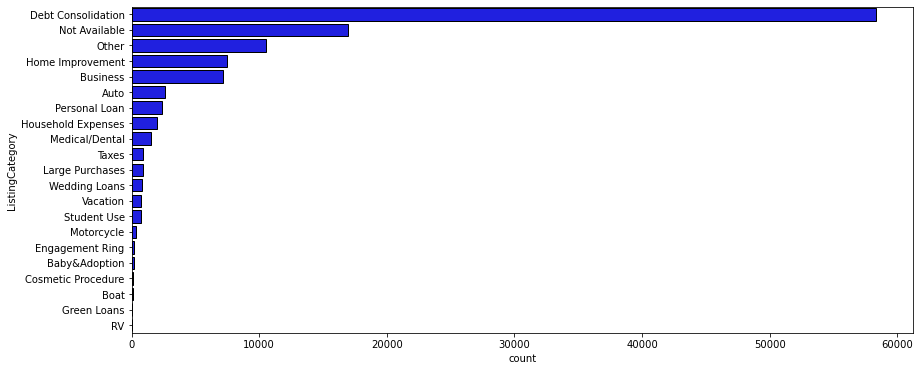

In [18]:
# plotting a Bar chart of the listing categories 
order = loans.ListingCategory.value_counts().index
plt.figure(figsize=(14,6))
sb.countplot(data=loans, y='ListingCategory',color= 'blue', order=order, edgecolor='black')
plt.show()

The above plot shows that Debt Consolidation is the major reason why people take loans, that is people take loans most of the times to pay off their previous loans.

#### Visualization 6

Analyzing the feature 'EmploymentStatus'

In [19]:
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

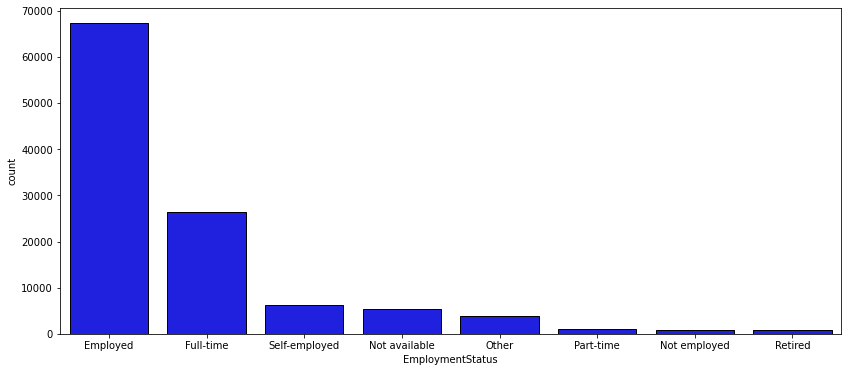

In [20]:
# plotting a bar chart to show the employment status of borrowers 

plt.figure(figsize=(14,6))
sb.countplot(data=loans, x='EmploymentStatus', color='blue', order=loans.EmploymentStatus.value_counts().index, 
              edgecolor='black')
plt.show()

The above diagram shows the majority of the people that take loans are employed, which shows how they make their money to be able to pay back loans.

#### Visualization 7

looking at the feature 'ProsperRating (Alpha)'

In [21]:

loans['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [22]:
# converting ProsperRating (Alpha) to ordered categorical types

rating_order = ['AA', 'A', 'B','C', 'D', 'E', 'HR']
ordered = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered)

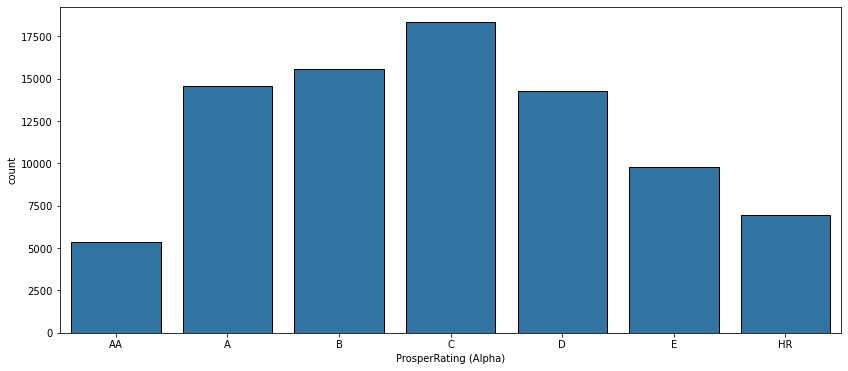

In [23]:
base_color = sb.color_palette()[0]

plt.figure(figsize=(14, 6))
sb.countplot(data= loans, x= 'ProsperRating (Alpha)', color=base_color, edgecolor='black')
plt.show()

From the statistical representation; the statistical score with the most rating is "C", followed by B nad then A and D.

#### Visualization 8

A quick analytical study of the 'Debt to Income Ratio'

In [24]:
loans.DebtToIncomeRatio.value_counts()

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.06375       1
0.06281       1
0.19960       1
0.17775       1
0.23284       1
Name: DebtToIncomeRatio, Length: 1207, dtype: int64

In [25]:
loans.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

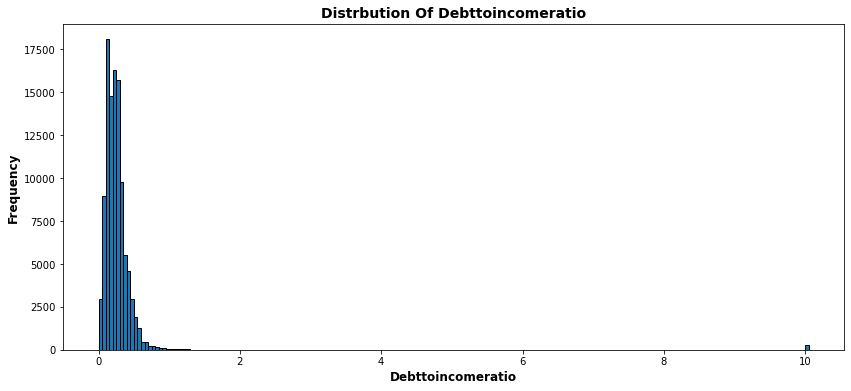

In [26]:
# plotting histogram;

myHistPlot(loans,'DebtToIncomeRatio', 0.05)

In [27]:
The distribution is multi-modal with several peaks.

SyntaxError: invalid syntax (3906593159.py, line 1)

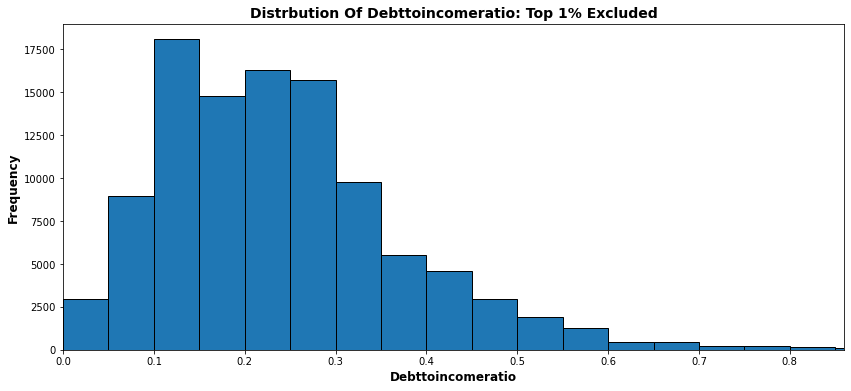

In [28]:
# calling plot function 
myHistPlot(loans,'DebtToIncomeRatio', 0.05, title=": Top 1% Excluded")

# set upper bound x axis (99th percentile)
plt.axis([0, loans['DebtToIncomeRatio'].quantile(0.99), None, None]);

Statistics shows that the DebtToIncomeRatios are less than 50%. There are some with high debt to income ratio. This ratio needs to be small for borrowers to be able to pay back their loans. The 0.1 axis recorded the highest peak.

#### Visualization 9

analyzing the feature 'IsBorrowerHomeowner'

In [29]:
loans['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

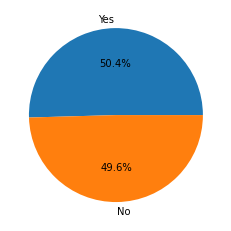

In [30]:
# plotting a pie chart to show proportion of people that are homeowners 

labels = ['Yes','No']
plt.pie(loans['IsBorrowerHomeowner'].value_counts(), labels=labels, autopct='%0.1f%%')
plt.show()

Statistics shows 50.4% of the customers are home owners, while 49.6% are not. This shows that slightly more customers are home owners.

#### Visualization 10

Analyzing the feature 'OriginalLoanAmount'

In [31]:
loans.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

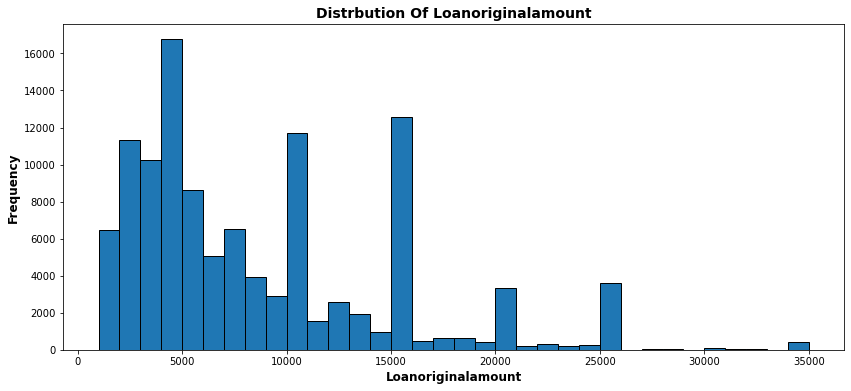

In [32]:
#plotting histogram;

myHistPlot(loans,'LoanOriginalAmount', 1000)


The histogram shows 4000 recorded the highest frequency, followed by some prominent peaks; 15000, 10000 and 2000.

#### Visualization 11

Analyzing the feature 'IncomeRange'

In [33]:
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [34]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
order = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
loans['IncomeRange'] = loans['IncomeRange'].astype(order)

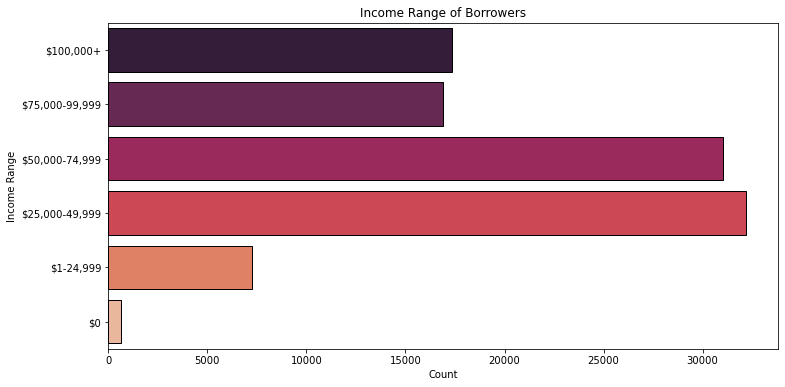

In [35]:
# plotting a bar chart to depict
plt.figure(figsize = [12, 6])
sb.countplot(data = loans, y = 'IncomeRange', palette = 'rocket', edgecolor='black')
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Income Range of Borrowers');


The income range with the highest number of borrowers is the $25,000 - 49,999 range, closely followed by the $50,000 -$74,999 range. Only a very few number of people did not earn anything ($0)

#### Visualization 12

Analyzing the feature 'StatedMonthlyIncome'

In [36]:
loans.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

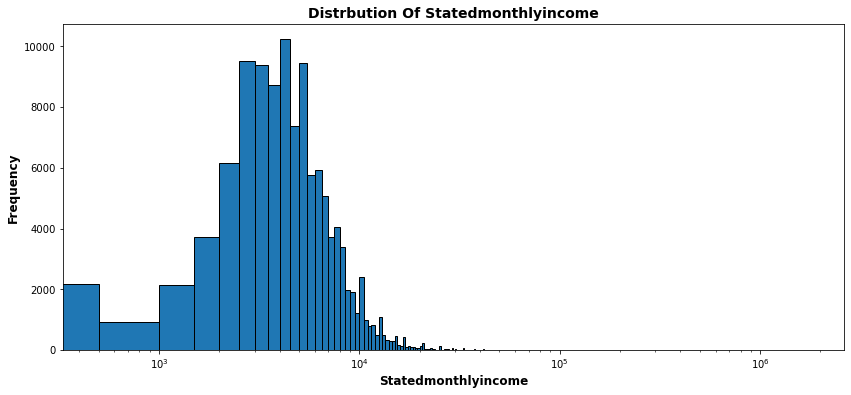

In [37]:
myHistPlot(loans,'StatedMonthlyIncome', 500)
plt.xscale('log')

The Histogram plot is higly skewed to the right

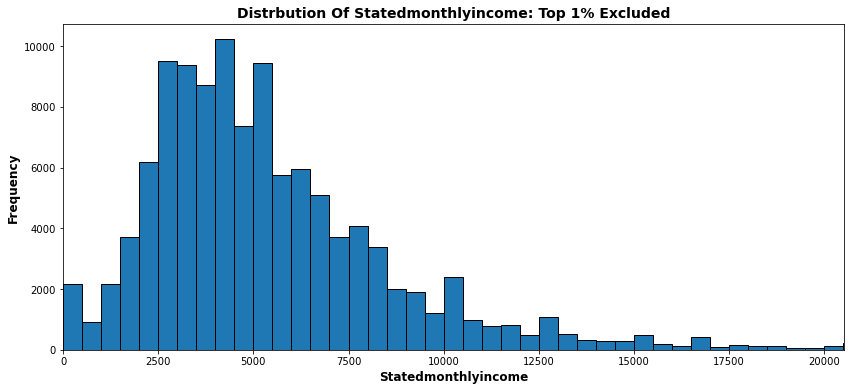

In [38]:
#To achieve a detailed view;

# call plot function 
myHistPlot(loans,'StatedMonthlyIncome', 500, title=": Top 1% Excluded")

# set upper bound x axis (99th percentile)
plt.axis([0, loans['StatedMonthlyIncome'].quantile(0.99), None, None]);

Statistics showed the majority of the borrowers (6,000 - 10,000+ people) have a monthly income within the range of 2500 - 5000, with the statistics attaining a peak around 4000.
Only very few borrowers(< 1000 people) earned 12,500 and above monthly.

#### Visualization 13

Exploring the feature 'MonthlyLoanPayment'

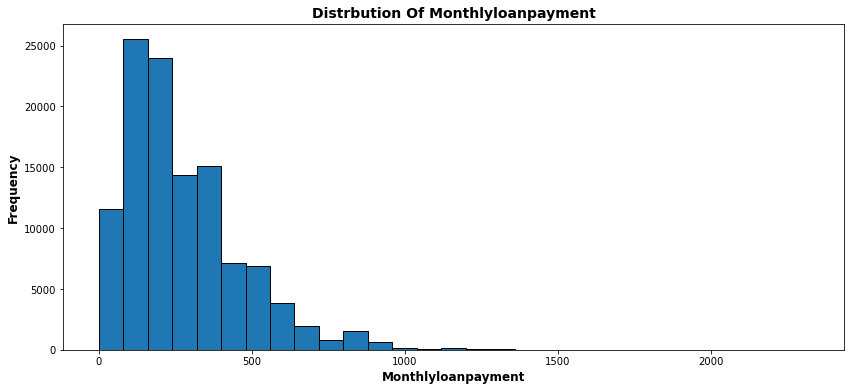

In [39]:
# plotting a histogram to display MonthlyLoanPayment Distribution

myHistPlot(loans,'MonthlyLoanPayment', 80)

The majority of borrowers(7000 - 25000+ people) pay 500 and below as their monthly loan payment, with the majority(> 25000 people) paying around 300 monthly.Statistics shows; extremely few people pay 1000 and above monthly. None pay neither 1500 or 2000 monthly as loan repayment.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

  1) I replaced the numbers with their corresponding meanings in other to achieve an accurate representation of the variables.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

  1) For income range; I combined the "Not employed", "Not displayed", and "0" categories together for a more detailed analysis
  2) For the income range, I created ordinal categories to achieve a more detailed analysis of findings.
  3) For the debttoincome ratio, I expanded the visualization using codes to be able to derive a more detailed and clear              visualization for analysis.

## Bivariate Exploration

> Finding Correlations between the features of my interest using bivariate exploration.

In [40]:
# separate into numeric and categorical features

numeric = ['BorrowerAPR', 'BorrowerRate','DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount']

categorical = ['Term', 'LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner','IncomeRange', 'ProsperRating (Alpha)',
            'ListingCategory' ]

#### Visualization 14

#### Quantitative Vs. Quantitave

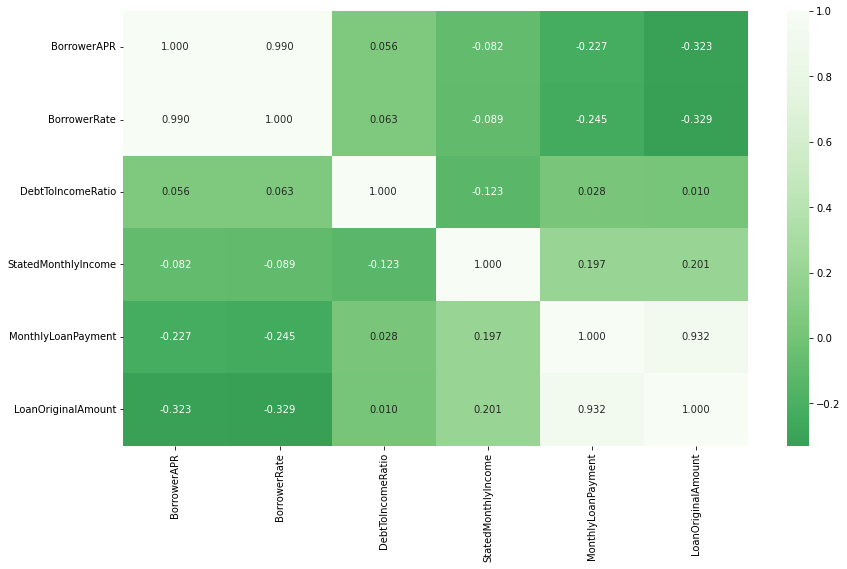

In [41]:
# plotting a correlation matrix as a heatmap;

plt.figure(figsize = [14, 8])
sb.heatmap(loans[numeric].corr(), annot = True, fmt = '.3f', center = 0, cmap = 'Greens_r')
plt.show()

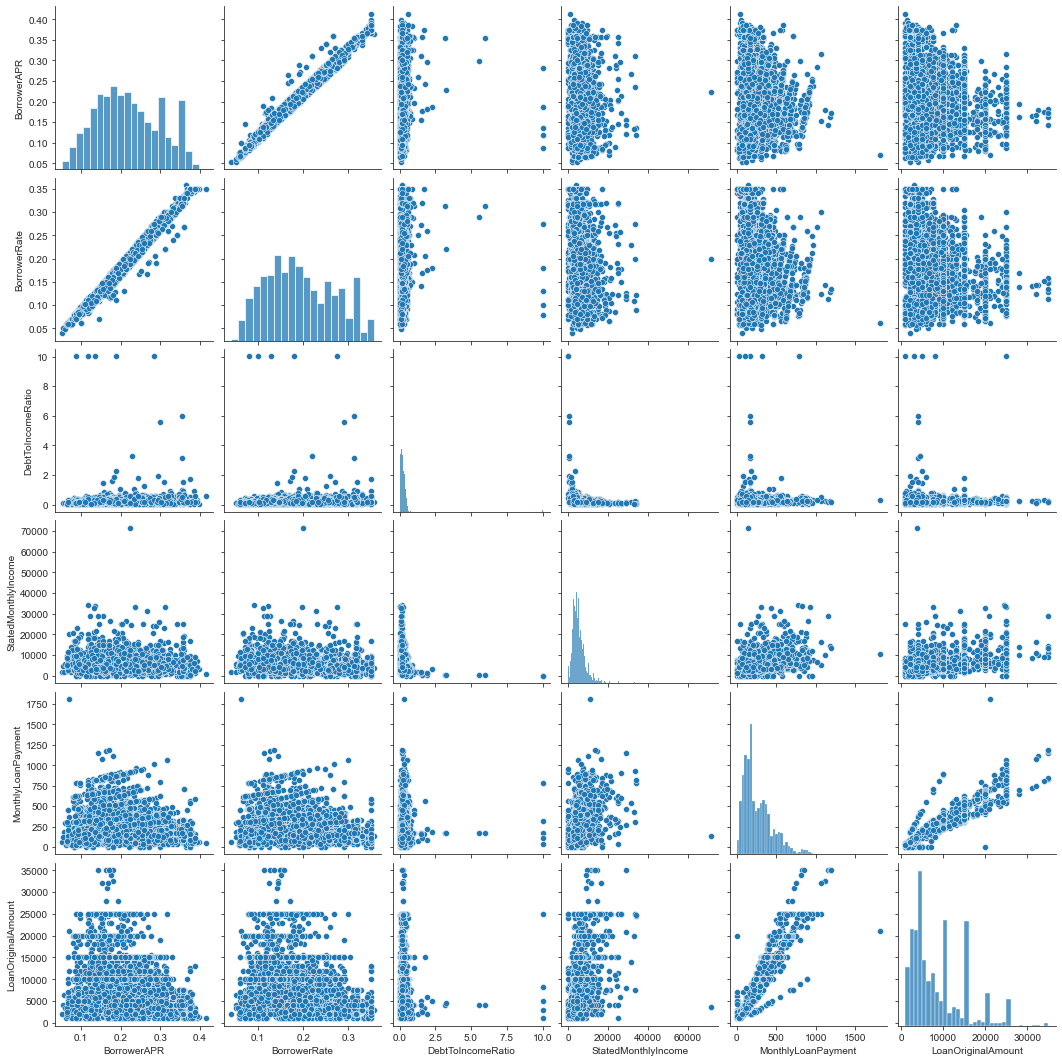

In [42]:
# taking a sample of 3000 loans to plot 
samples = np.random.choice(loans.shape[0], 3000, replace = False)
loans_sample = loans.loc[samples,:]

# plotting pairwise relationships between the all the numeric variables of interest 
sb.set_style("ticks")
sb.pairplot(data=loans_sample, vars=numeric)
plt.show()

### Insights

1) BorrowerAPR and BorrowerRate have a very strong correlation coefficient of 0.99. This is Great!. Having a high APR typically means borrowers will be paying more interest on their loans.

2) The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, that is the more the loan amount, the lower the APR.

3) Deducing from the statistics; The higher the LoanOriginalAmount, the higher the MonthlyLoanPayment.

4) The correlation coefficient of the LoanOriginalAmount and StatedMonthlyIncome is 0.20 showing a very slight positive relationsip between the two variables.

5) Very strong positive correlation between loan original amount and monthlyloan payment

#### Visualization 15

#### Qualitative vs. Qualitiative

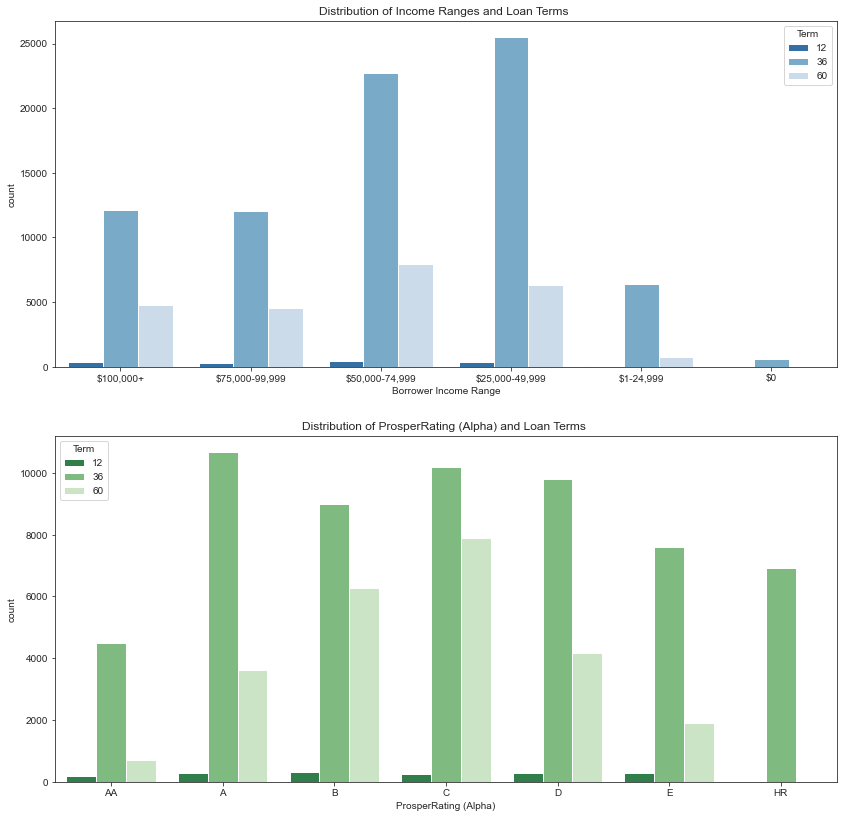

In [43]:
# clustered bar chart of income range and Term 
plt.figure(figsize = [14,14])

plt.subplot(2, 1, 1)
sb.countplot(data = loans, x = 'IncomeRange', hue = 'Term', palette = 'Blues_r')
plt.title('Distribution of Income Ranges and Loan Terms ')
plt.xlabel('Borrower Income Range');


# subplot 2: Prosper rating and term
plt.subplot(2, 1, 2)
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Greens_r')
plt.title('Distribution of ProsperRating (Alpha) and Loan Terms ')
plt.xlabel('ProsperRating (Alpha)');

### Insights

1) In the distribution of rating and loanterm correlation; over 10000 borrowers who who took a 36month (3years) term loan, rated "A" which was the highest rating followed by "C" (rated by same 36month term borrowers) and closely followed by "D". 

2) The highest number of borrowers(8000) who took the 60month term plan (5 years) rated "C", followed by about 6000 borrowers from the 60month term who rated "B".

3) Very few people (< 500) opted for the 12month plan and there was no significant difference in the ratings for it.

4) Only about 6000 borrowers(36 months term) gave a HR rating, while about 4500 borrowers(36month term) gave an AA rating, while less than 1000 borowers (60 months term) gave an AA rating.This shows that about 50% of the customer population from the 36month term attest to the company's extremely strong capacity to meet its financial commitments.

5) In the Distribution of income range and loanterm correlation; Over 25000 borrowers with income range of $25,000 - $49,999 opted for the 36months term plan which depicted the highest peak in the chart, followed by about 23000 borrowers within the salary range of $50,000 - $74,999 (36months term).The highest peak for the 60months term had an income range of $50,000 - $74,999, followed closely by an income range of $25,000 - $49,999. 

6) From the statistics; it was shown those with 0 income range only take loans for 36 months, while extremely few people with an income range of $25000 - $100000+ opted for the 12month plan.

#### Visualization 16

#### Quantitative vs. Qualitative

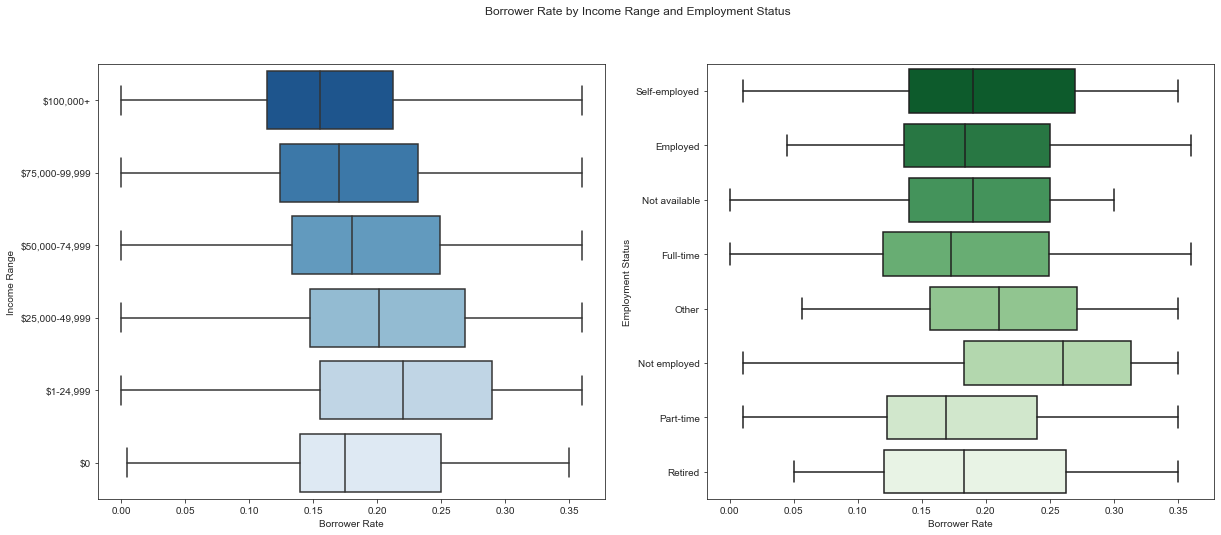

In [44]:
# boxplots between the numeric and categorical features 

# setting  figure size for subplots
plt.figure(figsize = [20, 8])

# subplot 1 
plt.subplot(1, 2, 1 )
# base_color = sns.color_palette()[1]
sb.boxplot(data = loans, y = 'IncomeRange', x = 'BorrowerRate', palette = "Blues_r", showfliers = False)
plt.ylabel('Income Range')
plt.xlabel('Borrower Rate')


# subplot 2
plt.subplot(1, 2, 2)
#base_color = sns.color_palette()[1]
sb.boxplot(data = loans, y = 'EmploymentStatus', x = 'BorrowerRate', palette = "Greens_r", showfliers = False)
plt.ylabel('Employment Status')
plt.xlabel('Borrower Rate')
plt.suptitle('Borrower Rate by Income Range and Employment Status')
plt.show()

### Insights

1) For the borrowerrate and employment correlation; The other category has the highest median borrower rate, strongly followed by the "Not-employed category". Other and unemployed individuals pay more interests on loans.

2) From the blue boxplots, we can clearly see that the income range of $1-$24,999 has the highest median Borrower rate. It is off from the trend of 25k and above income ranges where median borrower rate reduces with increased income, closely followed by the income range of $25000- $49000.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 1) The borrower APR is negatively correlated with the loan original amount, which means the more the loan amount, the lower        the APR.

 2) The income range of 25,000 - 49,999 take most of their loans for 36 months followed by the 50,000 - 74,999 income range.          Those with 0 income range only take loans for 36 months.
 
 3) The correlation coefficient of the LoanOriginalAmount and StatedMonthlyIncome is 0.20 showing a very slight positive             relationsip between the two variables.
 
 4) There is a strong correlations between BorrowerAPR and BorrowerRate and between MonthlyLoanPayment and LoanOriginalAmount
 
 5)  The other category has the highest median borrower rate, strongly followed by the "non-employed category". Other and            Unemployed individuals pay more interests on loans
 
 6)  In the distribution of rating and loanterm correlation; over 10000 borrowers who who took a 36month (3years) term loan,          rated "A" which was the highest rating followed by "C" (rated by same 36month term borrowers) and closely followed by "D".
 
 7) Only about 6000 borrowers(36 months term) gave a HR rating, while about 4500 borrowers(36month term) gave an AA rating,         while less than 1000 borowers (60 months term) gave an AA rating.This shows that about 50% of the customer population from       the 36month term attest to the company's extremely strong capacity to meet its financial commitments.
 
 8) In the Distribution of income range and loanterm correlation; Over 25000 borrowers with income range of $25,000 - $49,999       opted for the 36months term plan which depicted the highest peak in the chart, followed by about 23000 borrowers within the     salary range of $50,000 - $74,999 (36months term).The highest peak for the 60months term had an income range of $50,000 -       $74,999, followed closely by an income range of $25,000 - $49,999. 
 
 9)  Very strong positive correlation between loan original amount and monthlyloan payment


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1) The correlation coefficient between LoanOriginalAmount and StatedMonthlyIncome showing a very slight positive relationsip        between the two variables.


## Multivariate Exploration

#### Visualization 17

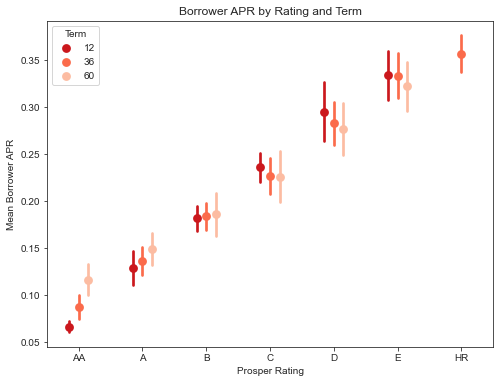

In [45]:
# plotting a point plot for rating, loan term and borrower APR 

fig = plt.figure(figsize = [8,6])
sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Reds_r', dodge = 0.3, ci='sd', linestyles = '')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term');

### Insights

1) The APR decreases with the increased of loan term for C - HR ratings.
2) For AA-B ratings, the APR increases with the increased of loan term.

#### Visualization 18

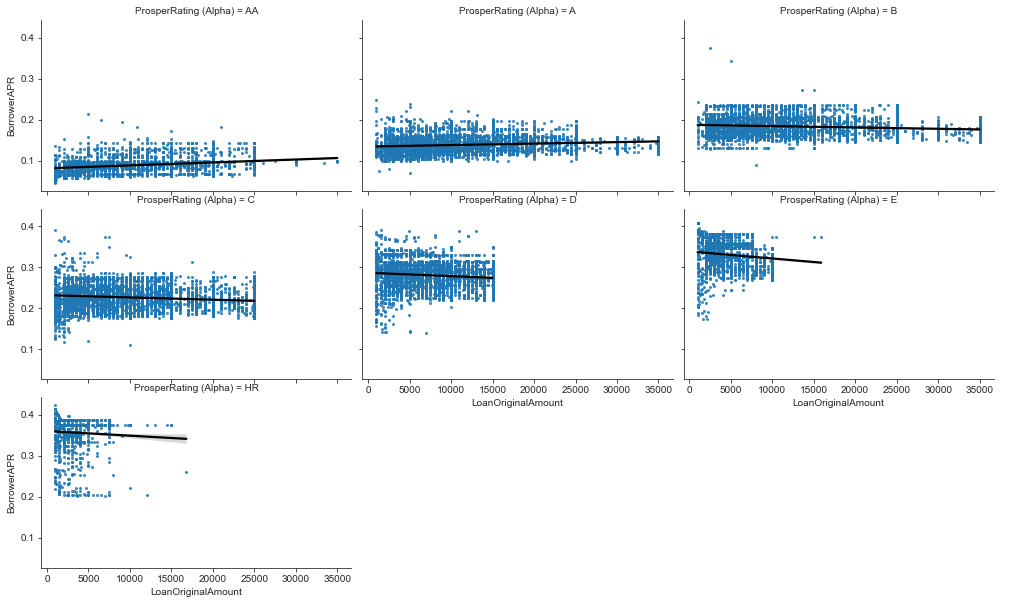

In [46]:
# Prosper Rating (Alpha) effect on APR and LoanOriginalAmount 

g=sb.FacetGrid(data=loans, aspect=1, height=6, col='ProsperRating (Alpha)', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'s':4}, line_kws={'color':'black'})
g.add_legend();

# set plot dimensions 
g.fig.set_size_inches(14, 8)

### Insights

1) There is a positive relationship between borrower APR and Prosper rating "AA"
2) The relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased.
3) The borrower APR decreases with better rating.
4) The loan amount increases with better rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1) The APR decreases with the increased of loan term for C - HR ratings.

2) For AA-B ratings, the APR increases with the increased of loan term.

3) There is a positive relationship between borrower APR and Prosper rating "AA"

4) The relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased.

5) The borrower APR decreases with better rating.

6) The loan amount increases with better rating.

### Were there any interesting or surprising interactions between features?

1) I observed that with higher loan amounts, the APR tends to be less

2) The loan amount increases with better rating.

## Conclusions

The overall rating and patronage of customers to Propser Loan services is great and commendable.
About 50% of the customers rated "AA" which attests to the company's extremely strong capacity to meet its financial commitments.
The 36months term plan(3 years) was chosen by about 70% of the company's customers at an average monthly loan payment rate of about 300 and the majority earned an income range of  25,000 - 49,999 . This depicts the outstanding service Prosper offers; ease of loan payment over a good duration of time at a moderate monthly installment fee.
Very few loans had a rate greater than 0.35.At 0.4 and 0.5; no loan rates recorded. This shows a lot of borrowers(over 7,000 people) were given the loans at an interest rate of 0.32, making repayment easy and less stressful.
The borrower APR was seen to be negatively correlated with the loan original amount, which means the more the loan amount, the lower the APR.
Other and non-employed category individuals pay more interests on loans.